In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.drop('Loan_ID', axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

## Distribution Of Loan Status

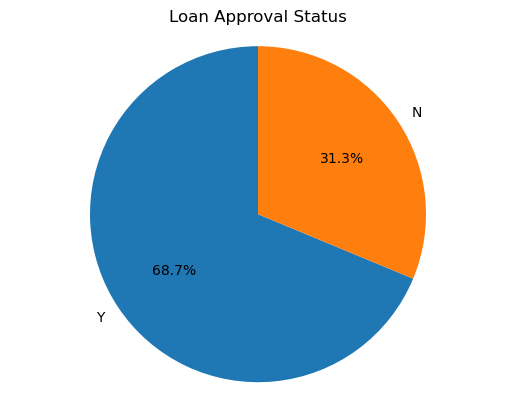

In [13]:
loan_status_count = df['Loan_Status'].value_counts()
fig, ax = plt.subplots()
ax.pie(loan_status_count, labels=loan_status_count.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  
plt.title('Loan Approval Status')
plt.show()

## Distribution Of Gender

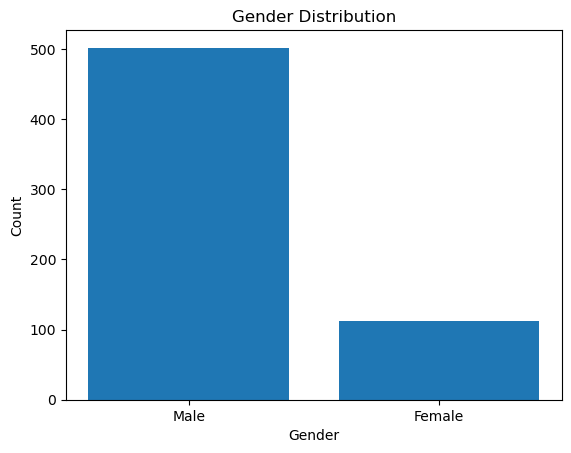

In [14]:
gender_count = df['Gender'].value_counts()
fig, ax = plt.subplots()
ax.bar(gender_count.index, gender_count.values)
ax.set_title('Gender Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.show()

## Distribution Of Martial Status

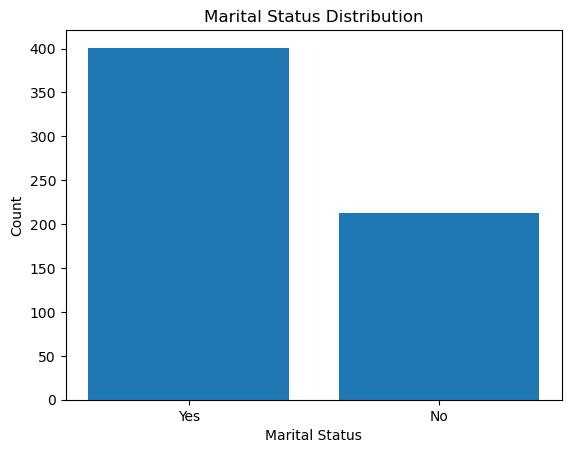

In [15]:
married_count = df['Married'].value_counts()
fig, ax = plt.subplots()
ax.bar(married_count.index, married_count.values)
ax.set_title('Marital Status Distribution')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
plt.show()

## Distribution Of Education

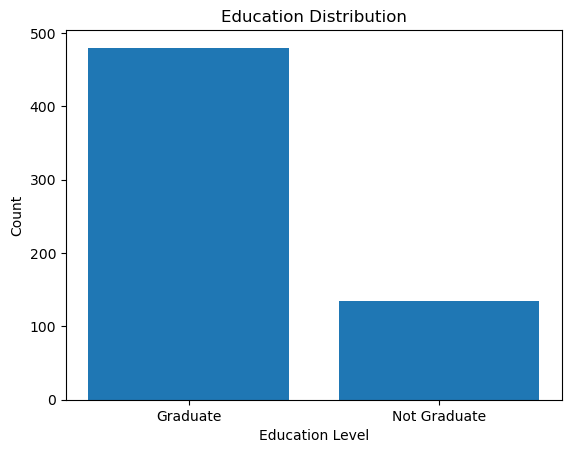

In [16]:
education_count = df['Education'].value_counts()
fig, ax = plt.subplots()
ax.bar(education_count.index, education_count.values)
ax.set_title('Education Distribution')
ax.set_xlabel('Education Level')
ax.set_ylabel('Count')
plt.show()

## Distribution of Self-Employment

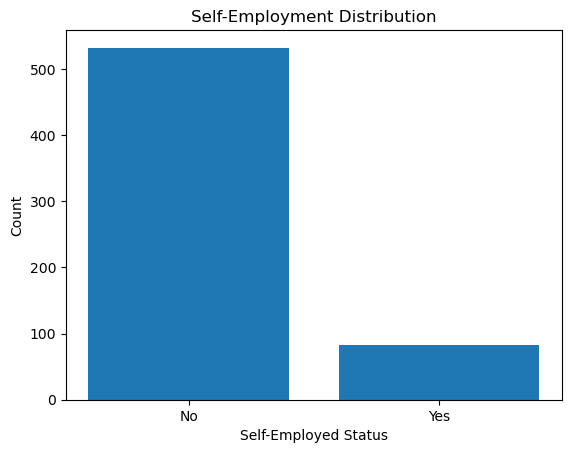

In [17]:
self_employed_count = df['Self_Employed'].value_counts()
fig, ax = plt.subplots()
ax.bar(self_employed_count.index, self_employed_count.values)
ax.set_title('Self-Employment Distribution')
ax.set_xlabel('Self-Employed Status')
ax.set_ylabel('Count')
plt.show()

## Distribution Of Applicant Income

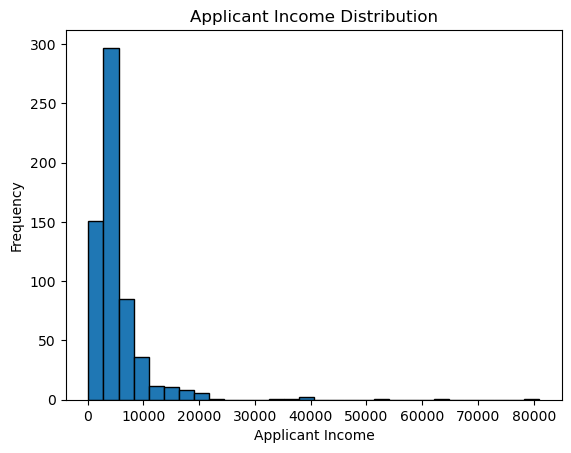

In [20]:
plt.hist(df['ApplicantIncome'], bins=30, edgecolor='black')
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

## Relationship Between Income Of Loan Applicant And Loan Status

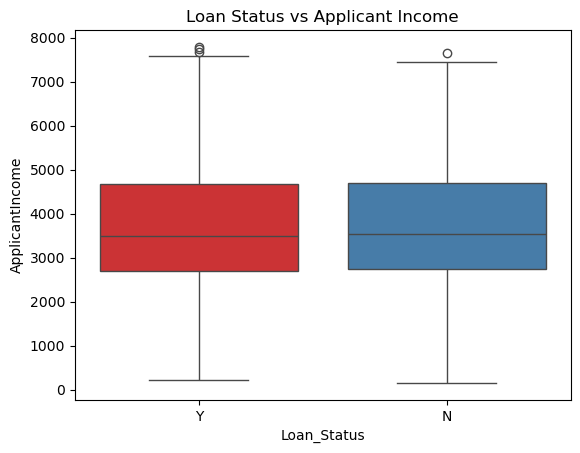

In [52]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df,hue='Loan_Status', palette='Set1')
plt.title('Loan Status vs Applicant Income')
plt.show()

## Removing Outliers From Applicant Income

In [39]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

## Relationship Between Loan Status And CoApplicantIncome

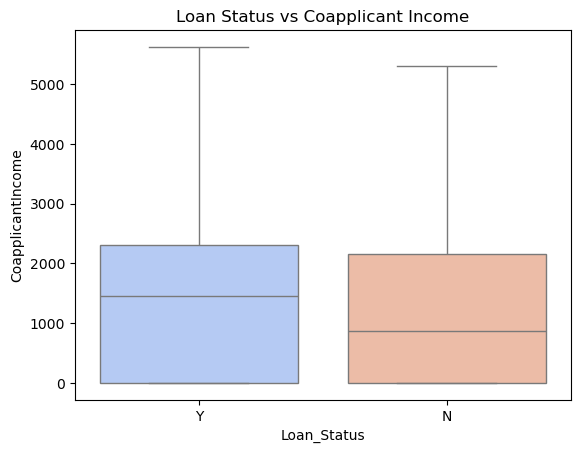

In [51]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df, hue='Loan_Status', palette='coolwarm')
plt.title('Loan Status vs Coapplicant Income')
plt.show()

## Removing Outliers From CoapplicantIncome

In [44]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

## Relationship Between Loan Amount And Loan Status

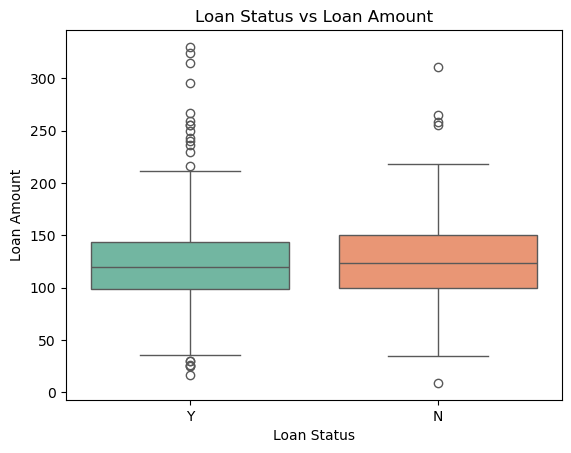

In [50]:
sns.boxplot(data=df, x='Loan_Status', y='LoanAmount',hue='Loan_Status', palette='Set2')
plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

## Relationship Between Credit History and Loan Status

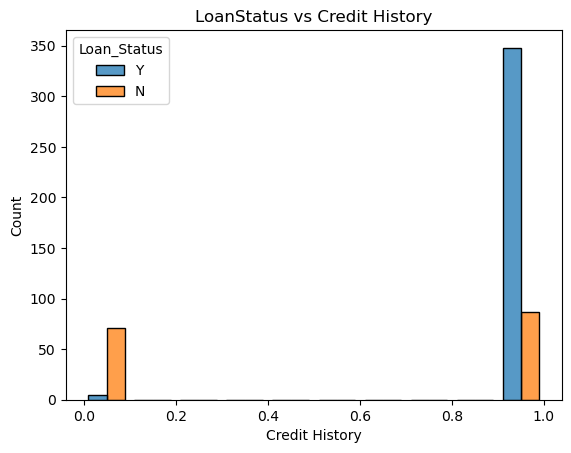

In [53]:
sns.histplot(data=df, x='Credit_History', hue='Loan_Status', multiple='dodge', shrink=0.8)
plt.title('LoanStatus vs Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

## Relationship Between Property Area And Loan Status

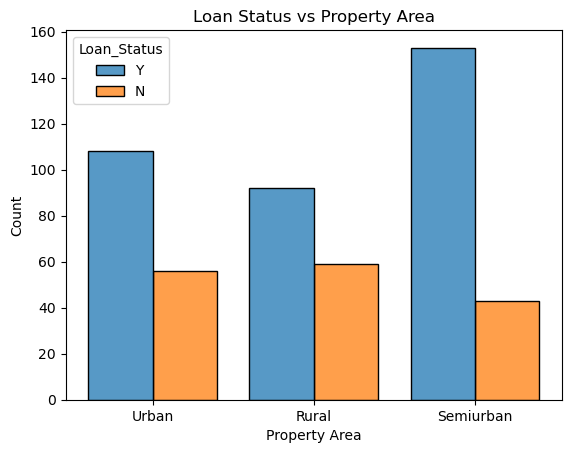

In [54]:
sns.histplot(data=df, x='Property_Area', hue='Loan_Status', multiple='dodge', shrink=0.8)
plt.title('Loan Status vs Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

## Loan Approval Prediction Model Using Logistic Regression

In [76]:
cat_cols = ['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
            'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
            'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
            'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 
            'Property_Area_Urban']

X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [80]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [81]:
y_pred_log_reg = log_reg_model.predict(X_test)

In [82]:
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.8252427184466019


## Loan Approval Prediction Model Using Random Forest

In [83]:
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [86]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
y_pred_rf = rf_model.predict(X_test)

In [88]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7766990291262136


## Random Forest With Gini

In [141]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]  
}

rf_model_gini = RandomForestClassifier(criterion='gini', random_state=42)

grid_search = GridSearchCV(estimator=rf_model_gini, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model_gini = grid_search.best_estimator_

In [142]:
y_pred_gini = best_model_gini.predict(X_test)

In [143]:
rf_accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(" Random Forest Accuracy With Gini Impurity:", rf_accuracy_gini)

 Random Forest Accuracy With Gini Impurity: 0.8155339805825242


## Random Forest With Entropy

In [144]:
rf_model_entropy = RandomForestClassifier(criterion='entropy', random_state=42)

grid_search_entropy = GridSearchCV(estimator=rf_model_entropy, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_entropy.fit(X_train, y_train)

best_model_entropy = grid_search_entropy.best_estimator_

In [145]:
y_pred_entropy = best_model_entropy.predict(X_test)

In [146]:
rf_accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Tuned Random Forest Accuracy with Entropy:", rf_accuracy_entropy)

Tuned Random Forest Accuracy with Entropy: 0.7961165048543689


## Loan Approval Prediction Model Using Decision Tree

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [121]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [122]:
y_pred_dt = dt_model.predict(X_test)

In [123]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7475728155339806


## Decision Tree With Gini

In [128]:
dt_model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, random_state=42)
dt_model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [129]:
y_pred_gini = dt_model_gini.predict(X_test)

In [131]:
dt_accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Decision Tree Accuracy with Gini Impurity:", dt_accuracy_gini)

Decision Tree Accuracy with Gini Impurity: 0.8155339805825242


## Decision Tree With Entropy

In [127]:
dt_model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=42)
dt_model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

In [132]:
y_pred_entropy = dt_model_entropy.predict(X_test)

In [133]:
dt_accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Decision Tree Accuracy with Entropy:", dt_accuracy_entropy)

Decision Tree Accuracy with Entropy: 0.7669902912621359


In [155]:
import pickle

In [157]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(log_reg_model, model_file)

## I Evaluated The Model's Performance Using Three Machine Learning Algorithms: Logistic Regression, Random Forest, And Decision Tree. Among These, Logistic Regression Demonstrated The Highest Accuracy, Achieving An Impressive 82.52%. This Result Indicates That, For This Particular Dataset, Logistic Regression Outperforms Both Random Forest And Decision Tree In Terms Of Predictive Accuracy.